# **Fandango**


## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de laspelículas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font> 
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos. 

## <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3o valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripcioón de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__..

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fn = pd.read_csv('/content/drive/MyDrive/Diplomado/ColaborativaPython/3 Análisis Exploratorio y Estadística/fandango_scrape.csv')
all = pd.read_csv('/content/drive/MyDrive/Diplomado/ColaborativaPython/3 Análisis Exploratorio y Estadística/fandango_score_comparison.csv')
print(fn.head())
all

                          FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [ ]:
all=all[["FILM","RottenTomatoes","RottenTomatoes_User","Metacritic","Metacritic_User","IMDB","Metacritic_user_vote_count","IMDB_user_vote_count"]]

In [ ]:
all

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


<font color='green'>Fin actividad 1</font>

## <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos. 
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



In [ ]:
sns.set(context='notebook',style='darkgrid',palette='dark')

In [ ]:
fn

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0
506,WWE SummerSlam 2015 (2015),0.0,0.0,0
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [ ]:
fn.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
np.round(fn.corr()['VOTES']['RATING'], decimals=2)

0.17

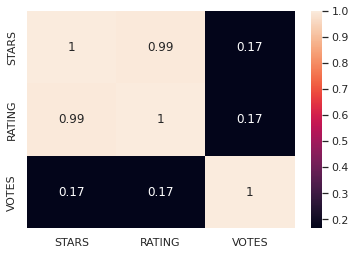

In [ ]:
# 2. Correlación entre las distintas variables
corr = fn.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# 3. Creamos una nueva columna con el año incluido en el nombre de las películas
fn['YEAR'] = fn.FILM.str[-5:-1]
fn 

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [ ]:
# 4. Las 10 películas con más votos
fn.sort_values('VOTES', ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [ ]:
fn.sort_values(['RATING',"VOTES"], ascending=[False, False])[:10]

,FILM,STARS,RATING,VOTES,YEAR
296,National Theatre Live: Man and Superman (2015),5.0,5.0,10,2015
304,Maze Runner: The Scorch Trials (2015),5.0,5.0,9,2015
317,Cheatin' (2015),5.0,5.0,8,2015
323,League of Legends LCS Summer Finals (2015),5.0,5.0,7,2015
329,Hotel Transylvania 2 (2015),5.0,5.0,6,2015
330,Soaked In Bleach (2015),5.0,5.0,6,2015
365,National Theatre Live: The Hard Problem (2015),5.0,5.0,4,2015
366,The Boy (2015),5.0,5.0,4,2015
367,The Perfect Guy (2015),5.0,5.0,4,2015
380,Fall to Rise (2015),5.0,5.0,3,2015


In [ ]:
# 5. Cuántas películas tienen cero votos
fn.shape[0] - np.count_nonzero(fn.loc[:,'VOTES'])

73

In [ ]:
len(fn.index)

510

In [ ]:
fn.groupby("VOTES").count().loc[0,'FILM']

73

In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
fn2 = fn.loc[fn.VOTES > 0]
fn2

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


In [ ]:
fn2.shape

(437, 5)

<font color='green'>Fin actividad 2</font>

## <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web. 
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

In [ ]:
fn2.loc[fn2.FILM.str.contains("Ted 2", case=False)]

,FILM,STARS,RATING,VOTES,YEAR
28,Ted 2 (2015),4.5,4.1,6437,2015


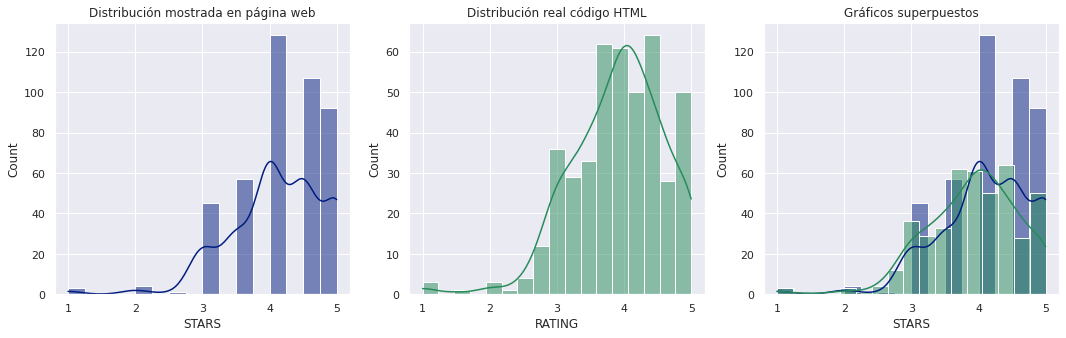

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs
fig, ax = plt.subplots(1,3,figsize=(18,5))
sns.histplot(data=fn2, x='STARS',kde=True, ax=ax[0]).set(title='Distribución mostrada en página web')
sns.histplot(data=fn2, x='RATING',kde=True, color='#278B5A', ax=ax[1]).set(title='Distribución real código HTML')
sns.histplot(data=fn2, x='STARS',kde=True, ax=ax[2]).set(title='Gráficos superpuestos')
sns.histplot(data=fn2, x='RATING',kde=True, color='#278B5A', ax=ax[2])
plt.show()
#no se lograba unificar ambos gráficos incluyendo una leyenda, se genera un tercer gráfico

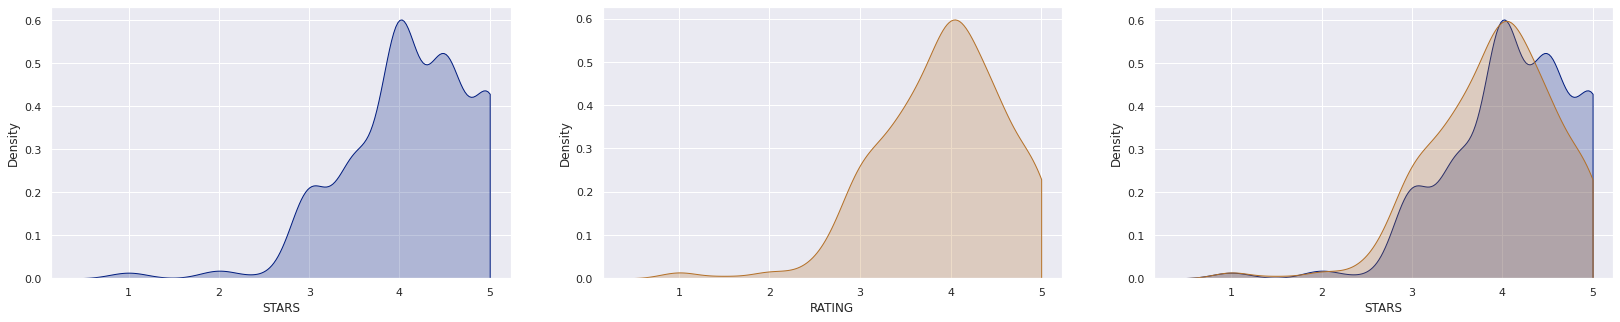

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(28,5))

sns.kdeplot(data=fn2, x='STARS', clip=[0,5], ax=ax[0], fill=True)
sns.kdeplot(data=fn2, x='RATING', clip=[0,5], ax=ax[1],color='#B47027', fill=True)
sns.kdeplot(data=fn2, x='STARS', clip=[0,5], ax=ax[2], fill=True)
sns.kdeplot(data=fn2, x='RATING', clip=[0,5], ax=ax[2],color='#B47027', fill=True)
plt.show()
#no se lograba unificar ambos gráficos incluyendo una leyenda, se genera un tercer gráfico

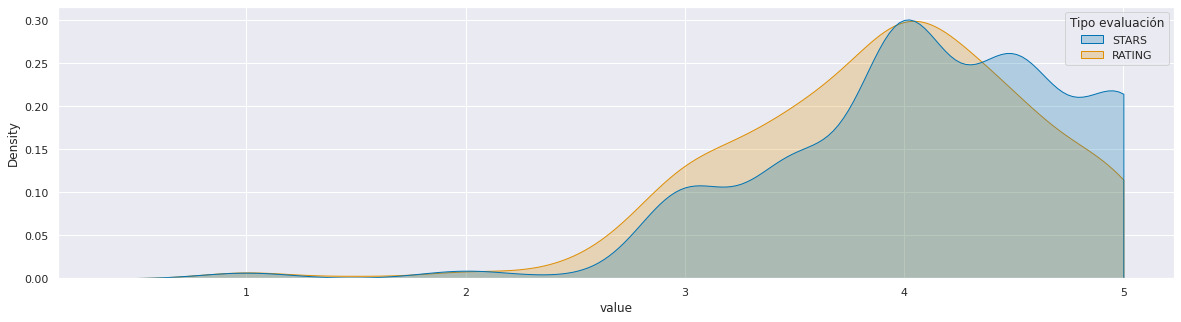

In [ ]:
#para solucionar problema anterior, se utiliza el método melt para hacer un 'unpivot' de las variables STARS y RATING
plt.figure(figsize=(20,5))
fn3 = fn2[['STARS','RATING']].melt(var_name='Tipo evaluación')
sns.kdeplot(data=fn3, x='value', clip=[0,5], hue='Tipo evaluación', fill=True, palette='colorblind')
plt.show()

In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia. 
fn2['DIF'] = (fn2.STARS-fn2.RATING).round(decimals = 1)
fn2

<ipython-input-36-378cb11f2487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fn2['DIF'] = (fn2.STARS-fn2.RATING).round(decimals = 1)


,FILM,STARS,RATING,VOTES,YEAR,DIF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [ ]:
fn2.loc[fn2.FILM.str.contains("Ted 2", case=False)]

,FILM,STARS,RATING,VOTES,YEAR,DIF
28,Ted 2 (2015),4.5,4.1,6437,2015,0.4


In [ ]:
fn2.groupby('DIF').count()

,FILM,STARS,RATING,VOTES,YEAR
DIF,,,,,
0.0,109,109,109,109,109
0.1,66,66,66,66,66
0.2,82,82,82,82,82
0.3,72,72,72,72,72
0.4,70,70,70,70,70
0.5,37,37,37,37,37
1.0,1,1,1,1,1


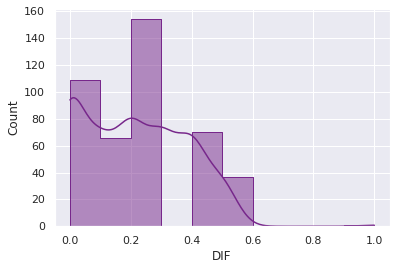

In [ ]:
# 3. Cantidad de veces que las diferencias se producen.
sns.histplot(data=fn2,x='DIF',bins=10,kde=True,color='#77278B',element="step")
plt.show()

In [ ]:
# 4. Buscamos la pelicula con una diferencia de una estrella
fn2.loc[fn2.DIF==1]

,FILM,STARS,RATING,VOTES,YEAR,DIF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


<font color='green'>Fin actividad 3</font>

## <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos. 

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

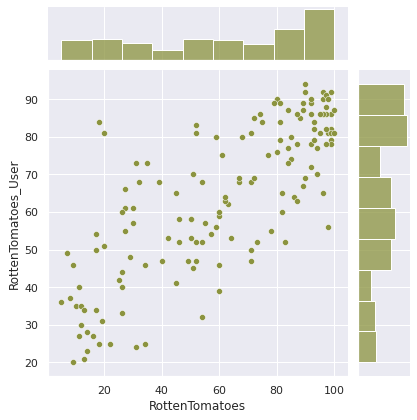

In [ ]:
# Tu código aquí ...
# 1. Dispersión de RT
sns.jointplot(data=all, x='RottenTomatoes', y='RottenTomatoes_User', color='#8B933F')
plt.show()

In [ ]:
# 2. Rotten_Diff =  Critics - User Score. 
all['Rotter_Diff'] = all.RottenTomatoes - all.RottenTomatoes_User

<ipython-input-45-9357832a63a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['Rotter_Diff'] = all.RottenTomatoes - all.RottenTomatoes_User


In [ ]:
# 3. Diferencia media absoluta
print(abs(all['Rotter_Diff']).sum()/all.shape[0])
print(abs(all['Rotter_Diff']).sum()/all.FILM.nunique()) #en este caso se asume todas las películas son distintas


15.095890410958905
15.095890410958905


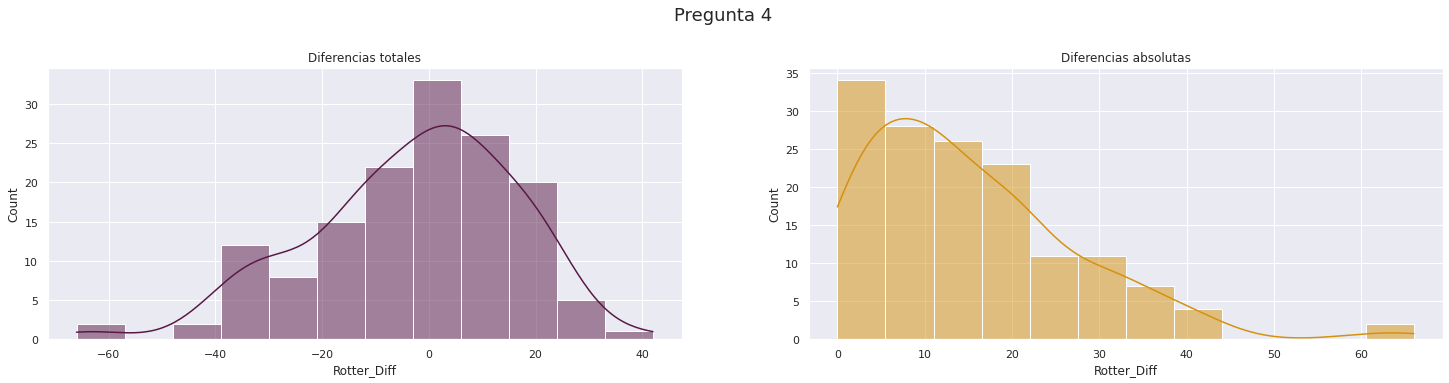

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
#La distribución de las diferencias entre RT Critics Score y RT User Score. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
#La distribución que muestre la diferencia en valor absoluto.
#Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

fig, ax = plt.subplots(1, 2, figsize=(25,5))
plt.suptitle("Pregunta 4", fontsize=18, y=1.05)

abdif = abs(all['Rotter_Diff'])
sns.histplot(all.Rotter_Diff, color='#581845', kde = True, ax = ax[0]).set(title='Diferencias totales')
sns.histplot(abdif, color='#D5910B', kde = True, ax = ax[1]).set(title='Diferencias absolutas')
plt.show()

In [ ]:
# 5. Películas más valoradas por los usuarios que por los críticos
all.loc[all.Rotter_Diff<0].sort_values('Rotter_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotter_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39
...,...,...,...,...,...,...,...,...,...
123,Magic Mike XXL (2015),62,64,60,5.4,6.3,52,11937,-2
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2
80,Paper Towns (2015),55,57,56,6.2,6.9,51,14156,-2
50,Pitch Perfect 2 (2015),67,68,63,5.7,6.7,192,56333,-1


In [ ]:
# Películas más valoradas por los críticos que por los usuarios
all.loc[all.Rotter_Diff>0].sort_values('Rotter_Diff', ascending=False)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotter_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24
...,...,...,...,...,...,...,...,...,...
117,Testament of Youth (2015),81,79,77,7.9,7.3,15,5495,2
9,Love & Mercy (2015),89,87,80,8.5,7.8,54,5367,2
92,Dope (2015),87,86,72,7.2,7.5,43,4911,1
23,Run All Night (2015),60,59,59,7.3,6.6,141,50438,1


<font color='green'>Fin actividad 4</font>

## <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

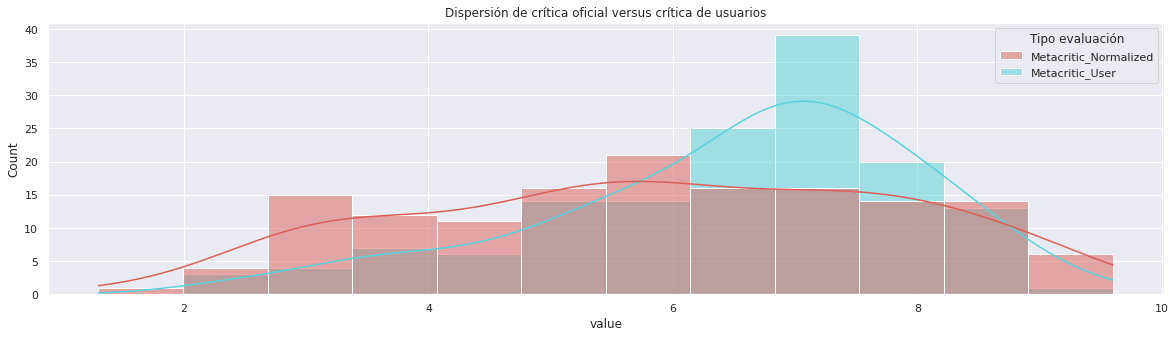

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión de crítica oficial versus de usuarios

#La evaluación de Metacritic está en escala 0-100, mientras que Metacritic_User está en escala 0-10. Primero se normalizan las evaluaciones de Metacritic a escala 0-10
all['Metacritic_Normalized'] = all.Metacritic/10

plt.figure(figsize=(20,5))
all2 = all[['Metacritic_Normalized','Metacritic_User']].melt(var_name='Tipo evaluación')
sns.histplot(data=all2, x='value', hue='Tipo evaluación', fill=True, kde=True, palette='hls').set(title='Dispersión de crítica oficial versus crítica de usuarios')
plt.show()

In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios 
all['Metacritic_Diff'] = all.Metacritic_Normalized - all.Metacritic_User

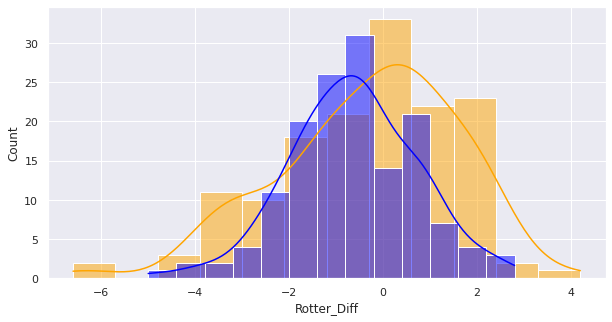

In [ ]:
# 3. Visualice las comparación de diferencias de RT con las de MetaCritic.
plt.figure(figsize=(10,5))
sns.histplot(all.Rotter_Diff/10, color='orange', kde=True) #Se normaliza el puntaje de escala 0-100 a 0-10
sns.histplot(all.Metacritic_Diff, color='blue', kde=True)
plt.show()

<font color='green'>Fin actividad 5</font>

## <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATING` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas? 

In [ ]:
# Tu código aquí ...
# 1. Merge de ambos datasets
fn3 = fn2.merge(all, how='inner', on='FILM')
#¿Cuántos registros se pierden en la fusión?
perdidos = fn2.shape[0] - fn3.shape[0]
print(f'Se perdieron {perdidos} datos en el merge con un inner join\n\n')
fn3

Se perdieron 290 datos en el merge con un inner join




,FILM,STARS,RATING,VOTES,YEAR,DIF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotter_Diff,Metacritic_Normalized,Metacritic_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,4.6,1.4
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,5.9,-1.1
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,7.2,0.6
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,6.7,-0.1
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,9.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,6.8,0.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,8.7,2.4
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,6.7,-0.3
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,8.6,1.3


In [ ]:
# 2. Normalización de las valoraciones
fn3.RottenTomatoes = fn3.RottenTomatoes/20 #originalmente escala 0-100
fn3.RottenTomatoes_User = fn3.RottenTomatoes_User/20 #originalmente escala 0-100
fn3.Metacritic = fn3.Metacritic/20 #originalmente escala 0-100
fn3.Metacritic_User = fn3.Metacritic_User/2 #originalmente escala 0-10
fn3.IMDB = fn3.IMDB/2 #originalmente escala 0-10
fn3

,FILM,STARS,RATING,VOTES,YEAR,DIF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotter_Diff,Metacritic_Normalized,Metacritic_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.25,2.10,2.30,1.60,2.10,778,179506,-17,4.6,1.4
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.55,4.05,2.95,3.50,3.65,1281,241807,-10,5.9,-1.1
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.60,4.25,3.60,3.30,3.70,850,251856,-13,7.2,0.6
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.05,4.20,3.35,3.40,3.70,764,207211,-3,6.7,-0.1
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.90,4.50,4.70,4.45,4.30,807,96252,8,9.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,4.35,3.15,3.40,3.20,3.35,19,5289,24,6.8,0.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,4.75,4.05,4.35,3.15,3.50,18,1107,14,8.7,2.4
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,4.65,4.20,3.35,3.50,3.90,4,732,9,6.7,-0.3
143,Tangerine (2015),4.0,3.9,36,2015,0.1,4.75,4.30,4.30,3.65,3.70,14,696,9,8.6,1.3


In [ ]:
# 3. Simplificación del DataFrame
copia = fn3.drop(columns=['VOTES',
                          'YEAR',
                          'DIF',
                          'Metacritic_user_vote_count',
                          'IMDB_user_vote_count',
                          'Rotter_Diff',
                          'Metacritic_Normalized',
                          'Metacritic_Diff'])
copia

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.35,3.15,3.40,3.20,3.35
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.75,4.05,4.35,3.15,3.50
142,The Wrecking Crew (2015),4.5,4.2,4.65,4.20,3.35,3.50,3.90
143,Tangerine (2015),4.0,3.9,4.75,4.30,4.30,3.65,3.70


## <font color='green'>**¿Fandango muestra calificaciones anormalmente altas (`STARS`)?**</font>
Las evaluaciones promedio de la plataforma son menores a las reales en el rango aproximado [2.2 , 4.4]. En el rango aproximado [4.4 , 4.5] se observa una correlación negativa entre ambas variables, impactando en una evaluación promedio de la página mayor a la real obtenida.

## <font color='green'>**¿Son las calificaciones en sí mismas más altas que el promedio (`RATING`)?**</font>
No siempre. En el rango (aproximado) [2.1 , 3.8] presenta evaluaciones promedio similares a otras plataformas, sin embargo, a partir del punto (aproximado) 4.1 Fandango presenta una distribución muy por encima de las otras plataformas, lo cual no se equipara hasta la posición (aproximada) 4.9

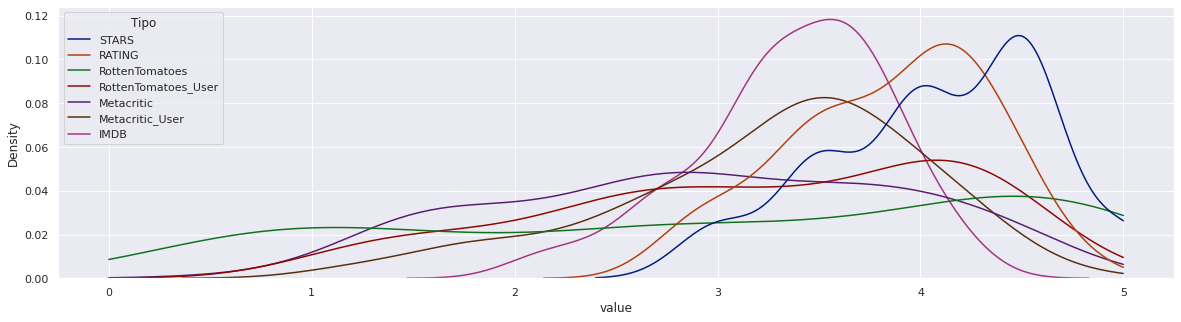

In [ ]:
# 4. Comparando distribuciones de valoraciones
copia2 = copia[['STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User','IMDB']].melt(var_name='Tipo')
plt.figure(figsize=(20,5))
sns.kdeplot(data=copia2, x='value', clip=[0,5], hue='Tipo')
plt.show()

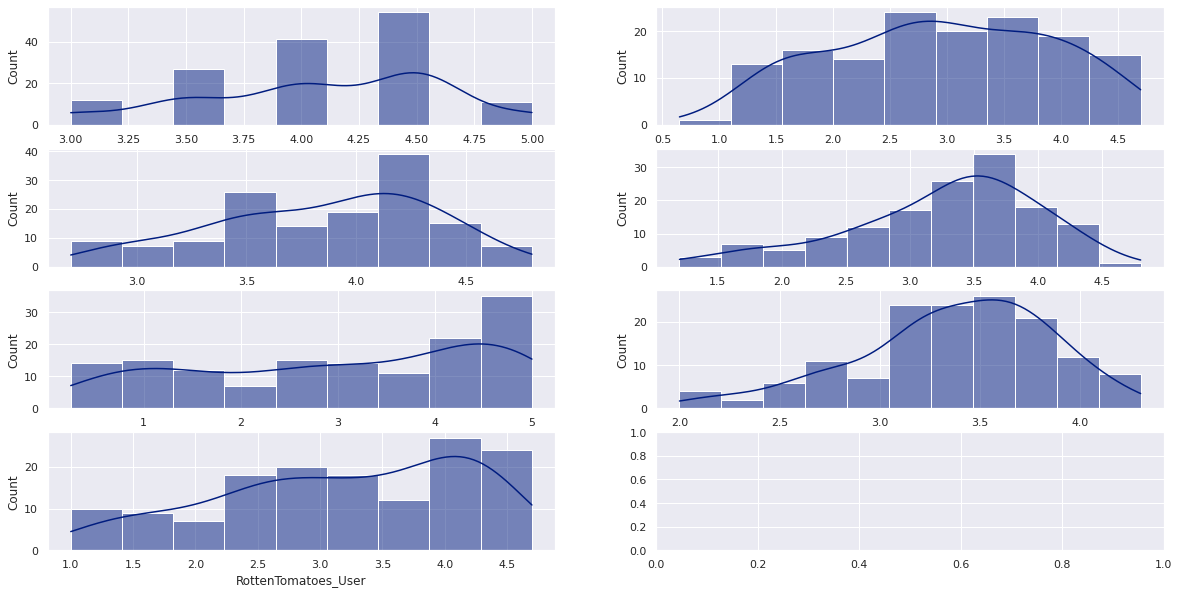

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.
fig, ax = plt.subplots(4,2,figsize=(20,10))

sns.histplot(copia, x='STARS', kde=True, ax=ax[0,0])
sns.histplot(copia, x='RATING', kde=True, ax=ax[1,0])
sns.histplot(copia, x='RottenTomatoes', kde=True, ax=ax[2,0])
sns.histplot(copia, x='RottenTomatoes_User', kde=True, ax=ax[3,0])
sns.histplot(copia, x='Metacritic', kde=True, ax=ax[0,1])
sns.histplot(copia, x='Metacritic_User', kde=True, ax=ax[1,1])
sns.histplot(copia, x='IMDB', kde=True, ax=ax[2,1])
plt.show()

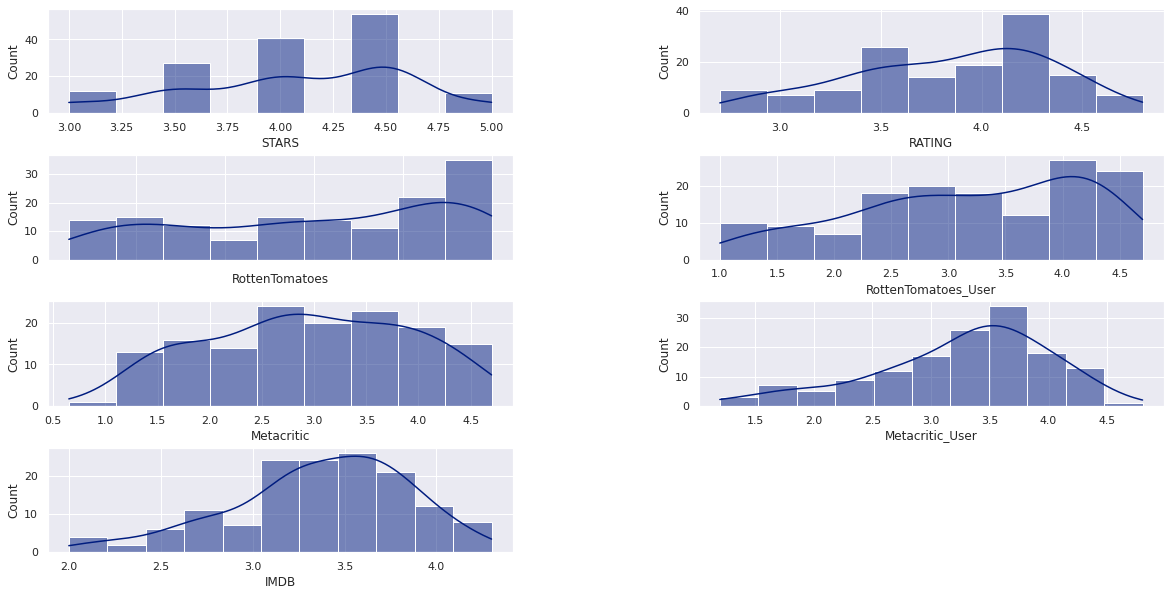

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas. Otra opción con el grillado para que no quede un grafico vacio al final
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(4, 2, 1)
sns.histplot(copia, x='STARS', kde=True, ax=ax)
ax = fig.add_subplot(4, 2, 2)
sns.histplot(copia, x='RATING', kde=True, ax=ax)
ax = fig.add_subplot(4, 2, 3)
sns.histplot(copia, x='RottenTomatoes', kde=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(4, 2, 4)
sns.histplot(copia, x='RottenTomatoes_User', kde=True, ax=ax)
ax = fig.add_subplot(4, 2, 5)
sns.histplot(copia, x='Metacritic', kde=True, ax=ax)
ax = fig.add_subplot(4, 2, 6)
sns.histplot(copia, x='Metacritic_User', kde=True, ax=ax)
ax = fig.add_subplot(4, 2, 7)
sns.histplot(copia, x='IMDB', kde=True, ax=ax)
plt.show()

In [ ]:
# 6. Clustermap
#¿Cómo se califican las peores películas en todos los sitios?
# Cree una visualización del tipo clustermap de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de Seaborn.
p6 = copia.copy()
p6.set_index('FILM', inplace=True)
p6

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
FILM,,,,,,,
Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...
"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.35,3.15,3.40,3.20,3.35
The Diary of a Teenage Girl (2015),4.0,3.6,4.75,4.05,4.35,3.15,3.50
The Wrecking Crew (2015),4.5,4.2,4.65,4.20,3.35,3.50,3.90


<Figure size 1800x4320 with 0 Axes>

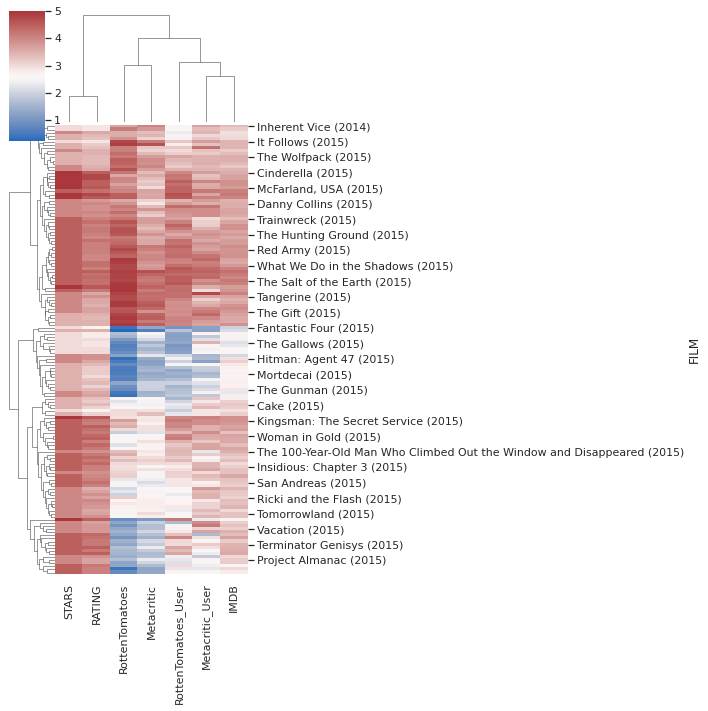

In [ ]:
plt.figure(figsize=(25,60))
sns.clustermap(p6, cmap='vlag')
plt.show()
#La variable Metacritic_User presenta un comportamiento que se asemeja más a la variable IMDB que a Metacritic.
#En el eje Y, la sección con barras azules y rojo claro muestra un conjunto de películas mal evaluadas, entre las que se encuentra algunas del ejercicio siguiente.

In [ ]:
# 7. Examinemos las 10 peores películas.
#Según las calificaciones de los críticos de RT, ¿cuáles son las 10 películas con las calificaciones más bajas?
all.sort_values(by='RottenTomatoes')[:10].FILM

133    Paul Blart: Mall Cop 2 (2015)
105          Hitman: Agent 47 (2015)
53                Hot Pursuit (2015)
48             Fantastic Four (2015)
15                    Taken 3 (2015)
33          The Boy Next Door (2015)
35                   The Loft (2015)
60        Unfinished Business (2015)
59                  Mortdecai (2015)
58                Seventh Son (2015)
Name: FILM, dtype: object

In [ ]:
# ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?
copia.sort_values(by='RottenTomatoes')[:10]

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


<font color='green'>Fin actividad 6</font>